# Uygulama Notları: 14
## FİZ219 - Bilgisayar Programlama I | 30/01/2020

* Genel Sınav Soru ve Çözümleri

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>


**1\. Soru**

Verilen üç girdinin ($a_1$, $a_2$, $N$) ilk ikisinden Fibonacci serisini ($a_n = a_{n-1}+a_{n-2}$) üretip, üçüncü girdi olan $N.$ terimi döndüren `fibo_n(a1, a2, N)` fonksiyonunu yazınız. ( örnek sonuç: `fibo_n(2,5,4) => 12` )

In [1]:
# Tercihen fibo_n.m dosyasi olarak
function f = fibo_n(a1,a2,N)
for i=3:N
    f = a1 + a2;
    a1 = a2;
    a2 = f;
endfor
endfunction

In [2]:
fibo_n(2,5,4)

ans =  12


**2\. Soru**

$f(x) = x^2 + 2.2x - 15$ fonksiyonunun köklerinin [-6,3] aralığında olduğu bilinmektedir.

a) Fonksiyonu tanımlayın.  
b) Bu fonksiyonun ilgili aralıkta grafiğini çizdiren komutu yazın.  
c) $\epsilon = 10^{-6}$ yakınsaklıkla kökleri bulan kod yazın.

In [3]:
# a)
function f=fonk(x)
    f = x.^2 + 2.2*x - 15;
endfunction

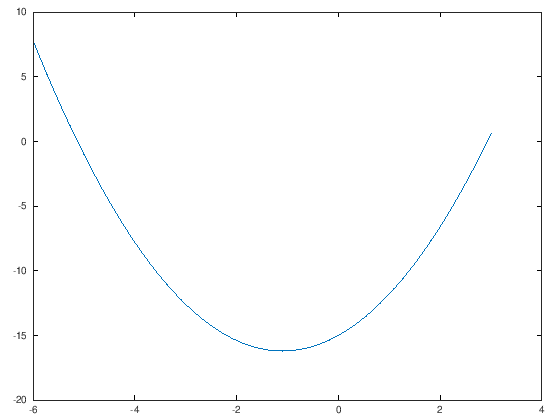

In [4]:
# b)
x = linspace(-6,3,100);
plot(x,fonk(x));

In [5]:
# c)
epsilon = 10^-6;

# 1. kok:
a = -6;
b = 3;
f_a = fonk(a);
f_b = fonk(b);
kok1 = (a + b)/2;
kok_onceki = -100;
i = 0;
while (abs(kok1-kok_onceki)>epsilon)
    f_kok = fonk(kok1);
    i++;
    printf("%04d. %10.7f | %10.7f | %10.7f \t%9.5f\n",i,a,kok1,b,f_kok);
    if(sign(f_a) == sign(f_kok))
        a = kok1;
        f_a = f_kok;
    else
        b = kok1;
        f_b = f_kok;
    endif
    kok_onceki = kok1;
    kok1 = (a + b)/2;
endwhile
printf("1. Kok: %.9f\n",kok1);

printf("\n--------------------------\n")

# 2. kok:
a = kok1+epsilon;
b = 3;
f_a = fonk(a);
f_b = fonk(b);
kok2 = (a + b)/2;
kok_onceki = -100;
i = 0;
while (abs(kok2-kok_onceki)>epsilon)
    f_kok = fonk(kok2);
    i++;
    printf("%04d. %10.7f | %10.7f | %10.7f \t%9.5f\n",i,a,kok2,b,f_kok);
    if(sign(f_a) == sign(f_kok))
        a = kok2;
        f_a = f_kok;
    else
        b = kok2;
        f_b = f_kok;
    endif
    kok_onceki = kok2;
    kok2 = (a + b)/2;
endwhile
printf("2. Kok: %.9f\n",kok2);


# Kontrol edelim:
printf("\nroots() fonksiyonu ile bulunan kökler:\n%.9f\t%.9f\n",roots([1 2.2 -15]))

0001. -6.0000000 | -1.5000000 |  3.0000000 	-16.05000
0002. -6.0000000 | -3.7500000 | -1.5000000 	 -9.18750
0003. -6.0000000 | -4.8750000 | -3.7500000 	 -1.95938
0004. -6.0000000 | -5.4375000 | -4.8750000 	  2.60391
0005. -5.4375000 | -5.1562500 | -4.8750000 	  0.24316
0006. -5.1562500 | -5.0156250 | -4.8750000 	 -0.87788
0007. -5.1562500 | -5.0859375 | -5.0156250 	 -0.32230
0008. -5.1562500 | -5.1210938 | -5.0859375 	 -0.04081
0009. -5.1562500 | -5.1386719 | -5.1210938 	  0.10087
0010. -5.1386719 | -5.1298828 | -5.1210938 	  0.02996
0011. -5.1298828 | -5.1254883 | -5.1210938 	 -0.00544
0012. -5.1298828 | -5.1276855 | -5.1254883 	  0.01225
0013. -5.1276855 | -5.1265869 | -5.1254883 	  0.00340
0014. -5.1265869 | -5.1260376 | -5.1254883 	 -0.00102
0015. -5.1265869 | -5.1263123 | -5.1260376 	  0.00119
0016. -5.1263123 | -5.1261749 | -5.1260376 	  0.00008
0017. -5.1261749 | -5.1261063 | -5.1260376 	 -0.00047
0018. -5.1261749 | -5.1261406 | -5.1261063 	 -0.00019
0019. -5.1261749 | -5.126157

Alternatif olarak, kök bulma kısmını fonksiyonlaştırsaydık, gereksiz tekrarlardan da kurtulmuş olurduk:

In [6]:
function kok=kok_bul_fonk(a,b,epsilon)
# 'fonk' fonksiyonun [a,b] araliginda 
# yarilama (bisection) yontemi ile 
# epsilon yaklasiklikla kokunu bulur.

if(a>b)
    # Eger a, b degerinden buyukse,
    # yerlerini degistiriyoruz
    c = a;
    a = b;
    b = c;
endif

f_a = fonk(a);
f_b = fonk(b);
kok = (a + b) / 2;
kok_onceki = a - 1;

while(abs(kok-kok_onceki)>epsilon)
    f_kok = fonk(kok);
    if(sign(f_a) == sign(f_kok))
        a = kok;
        f_a = f_kok;
    else
        b = kok;
        f_b = f_kok;
    endif
    kok_onceki = kok;
    kok = (a + b) / 2;
endwhile
endfunction

a = -6;
b = 3;
epsilon = 1E-6;
kok1 = kok_bul_fonk(a,b,epsilon);
kok2 = kok_bul_fonk(kok1+epsilon,b,epsilon);
printf("1. Kok: %10.7f\n2. Kok: %10.7f\n",kok1,kok2)

1. Kok: -5.1261647
2. Kok:  2.9261636


**3\. Soru**

Bir sınıftaki _n_ öğrencinin 2 ara sınav ve bir genel sınav notları $(n\times3)$  boyutundaki bir `notlar` matrisinde tutulmaktadır (`notlar` matrisinin tanımlanmış olarak elinizde bulunduğunu varsayın).

a) `notlar` matrisine 4. sütun olarak ağırlıklı not ortalamalarını hesaplayın (ara sınavların ortalamalarının %50’si + genel sınavın %50’si)  
b) Ortalamaları 50’ye eşit veya 50’den büyük olan öğrenciler dersten geçeceklerdir. Bu öğrencilerin sayısını hesaplayın.  
c) Dersi geçen öğrencilerin ortalamalarının ortalamasını hesaplayın.

In [7]:
# Ogrenci sayisini [50,300] arasinda rasgele olarak belirleyip, 
# rasgele olarak notlar matrisini olusturalim:
n = randi([50,300]);
notlar = randi([0 100],[n 3]);
notlar(1:5,:)

ans =

   35   85   60
   58    7   67
   40    1   62
   90   80   37
   26    9   19



In [8]:
# a)
notlar(:,4) = (notlar(:,1) + notlar(:,2))/4 + notlar(:,3)/2;
notlar(1:5,:)

ans =

   35.0000   85.0000   60.0000   60.0000
   58.0000    7.0000   67.0000   49.7500
   40.0000    1.0000   62.0000   41.2500
   90.0000   80.0000   37.0000   61.0000
   26.0000    9.0000   19.0000   18.2500



In [9]:
# b)
gecenler_ort = notlar(notlar(:,4)>=50,4);
gecenler_ort(1:5)

rows(gecenler_ort)

ans =

   60.000
   61.000
   71.250
   50.000
   71.750

ans =  59


In [10]:
# c)
gecenler_ort_ort = mean(gecenler_ort)

# veya:
gecenler_ort_ort = sum(gecenler_ort) / rows(gecenler_ort)

gecenler_ort_ort =  64.750
gecenler_ort_ort =  64.750


**4\. Soru**

Elinizde 10 m uzunluğunda bir ip var. Bu ipten $(a,b)$ kenar uzunluklarına sahip bir dikdörtgen yapıp, maksimum büyüklükte alanı kapatmanız isteniyor. Bu durumda, biliyoruz ki, maksimum alanı verecek olan şekil $a=b=2.5$m olan bir kare olacaktır.

$$a+b=5\rightarrow S = a\cdot b = a(5-a) \\
\rightarrow \frac{\partial S}{\partial a} = 5 - 2a = 0\\\Rightarrow a = 2.5 \rightarrow b = 5 - a = 2.5$$

Bu sonucu $a$’yı 0.1 aralıklarla 0’dan 5’e kadar arttırıp, karşılık gelen $b$ değerlerini bulup, alanı hesaplatıp, en büyük alanın $a=b=2.5$m olduğunu ispatlayan bir programla doğrulayınız.  

**Bonus:** $a$’nın değerlerine karşılık gelen alan değerlerinin grafiğini çizdirin – 5 puan

Maksimum alani veren a: 2.50 m
Bu degere karsilik bulunan alan:  6.250 m^2


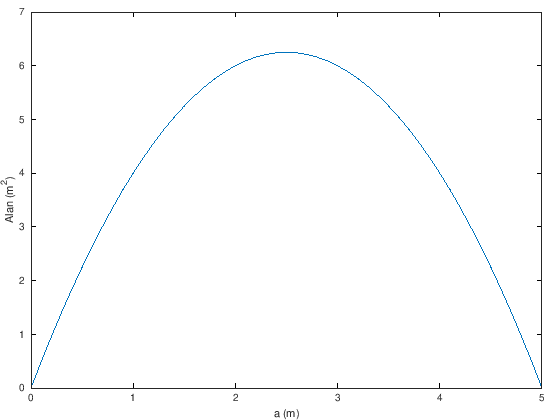

In [11]:
alar=0:0.1:5;
Alanlar=[];
a_max = 0;
Alan_max = 0;
for a=alar
    b = 5 - a;
    Alan = a * b;
    if(Alan > Alan_max)
        a_max = a;
        Alan_max = Alan;
    endif
    Alanlar = [Alanlar Alan];
endfor

printf("Maksimum alani veren a: %4.2f m\n",a_max);
printf("Bu degere karsilik bulunan alan: %6.3f m^2\n",Alan_max);

plot(alar,Alanlar);
xlabel("a (m)");
ylabel("Alan (m^2)");

**5\. Soru**

**2-boyutlu sarhoş yürüyüş problemi:** Fizikte, matematikte ve istatistikte modellemeler için sıklıkla kullanılan bir ilerleme metodu bu adla anılmaktadır. 2-boyutlu uygulaması için orijinde $(x,y)=(0,0)$ duran birini düşünün, tamamıyla tesadüfi olarak eşit ihtimalle (%25) doğuya, batıya, kuzeye veya güneye bir adım atar (adım uzunluğunu 1 birim alın). Bu şekilde (yani her adımı attıktan sonra bir sonraki adımının dört temel yönden biri olma ihtimalinin eşit olduğu şekilde) $N$ adım attıktan sonra, başlangıç noktasından uzaklaşma mesafesini hesaplayan bir kod yazınız. 

In [12]:
# En acik haliyle

N = randi([10,200]);
N=1000; # Hiz karsilastirmasi yapmak icin ayni N degeri
konum = [0,0];

tic();
for i=1:N
    yon = randi([1,4]);
    if(yon == 1)
        # Dogu
        konum = konum + [1 0];
    elseif(yon == 2)
        # Bati
        konum = konum + [-1 0];
    elseif(yon == 3)
        # Kuzey
        konum = konum + [0 1];
    elseif(yon == 4)
        # Guney
        konum = konum + [0 -1];
    endif
endfor

mesafe = sqrt(konum(1)^2 + konum(2)^2)
toc()

mesafe =  45.695
Elapsed time is 0.0923409 seconds.


In [13]:
# Daha ustaca bir yaklasim

N = randi([10,200]);
N=1000; # Hiz karsilastirmasi yapmak icin ayni N degeri
konum = [0,0];

tic();
yon = [1 0
-1 0
0 1
0 -1];
yonler = randi([1,4],[1,N]);
for i=1:N
    konum = konum + yon(yonler(i));
endfor

mesafe = norm(konum)
toc()

mesafe =  1.4142
Elapsed time is 0.017318 seconds.


In [14]:
# Daha da ustaca bir yaklasim

N = randi([10,200]);
N=1000; # Hiz karsilastirmasi yapmak icin ayni N degeri
konum = [0,0];

tic();

konumlar =  randi([1,4],[1,N]);
xler_net = sum(konumlar==1) - sum(konumlar==2);
yler_net = sum(konumlar==3) - sum(konumlar==4);

mesafe = norm([xler_net yler_net])
toc()

mesafe =  29.967
Elapsed time is 0.00631499 seconds.


In [15]:
# En super yaklasim 
# (ama 4 ana yonden baska, capraz yonlere de izin olsaydi)

N = randi([10,200]);
N=1000; # Hiz karsilastirmasi yapmak icin ayni N degeri
konum = [0,0];

tic();

konumlar = randi([0,1],[N,2]);
konumlar(konumlar(:,:)==0) = -1;

mesafe = norm(sum(konumlar))
toc()

mesafe =  52.154
Elapsed time is 0.00525904 seconds.


**Bonus:** daha önce ziyaret ettiği bir noktaya gelirse bu noktaya gitmek yerine başka bir yöne gitsin (10 puan); eğer 4 yöne de daha önce gidilmişse pes etsin (10 puan daha)

61. adimda (-8,8) cikmaza dustuk!
mesafe =  11.314
ans =

    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   51   52    0    0
    0    0    0    0    0    0    0    0    0    0   49   50   53   54    0
    0    0    0    0    0    0    0    0    0   47   48   57   56   55    0
    0    0    0    0    0    0    0    0   45   46   59   58    0    0    0
    0   15   16    0    0    0   42   43   44   61   60    0    0    0    0
    0   14   17   18    0    0   41   40   39   38    0    0    0    0    0
    0   13   12   19   20   21   34   35   36   37    0    0    0    0    0
    0    0   11   10   23   22   33   32    0    0    0    0    0    0    0
    0    0    0    9   24   25    0   31    0    0    0    0    0    0    0
    0    0    7    8    0   26   29   30    0    0    0    0    0    0    0
    0    0    6    5    0   27   28    0    0    0    0    0    0    0    0
    0    2    3    4    0    0

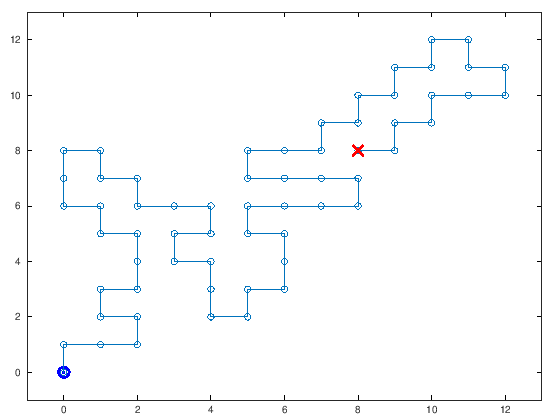

In [16]:
% 2 Boyutlu, 4 ana yone sarhos yuruyus problemi
% Daha once gidilen yere gidilmez.
% Gidecek yon kalmayinca programdan cikilir.
%
% FIZ219 - Bilgisayar Programlama I dersi
% Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

clear;

N = randi([10,200]);
N=1000;

konum = [0,0];
konumlar = [];
konumlar = [konumlar; konum];

olasi_yonler = [1 0;-1 0;0 1;0 -1];


% (0,0)'dan baslayip, 4 yone de gidebildigimiz
% icin konumumuz negatif degerler de alabilir.
% Halbuki, konumlari isaretleyecegimiz 'Harita'
% matrisimizin indisleri sadece pozitif degerler
% olmak zorunda. Bu yuzden bir numara yapip,
% orijinimizi matrisimizin ortasina tasiyoruz.
Harita = zeros(2*N+1,2*N+1);
knp1 = konum+N+1;
Harita(knp1(1),knp1(2)) = 1;

for i=1:N
    % Konumu kontrol et:
    pes_etsin_mi = 1;
    konum2harita = konum+N+1;
    for j = 1:4
            knp1 = konum2harita+olasi_yonler(j,:);
            if(Harita(knp1(1),knp1(2)) == 0)
                pes_etsin_mi = 0;
                break;
            endif
    endfor
    if(pes_etsin_mi == 1)
        printf("%d. adimda (%d,%d) cikmaza dustuk!\n",i,konum(1),konum(2));
        break;
    endif

    % Bu noktada biliyoruz ki en az bir tane gidilebilecek yer var
    olasi_konum = konum; 
    knp1 = olasi_konum+N+1;
    while(Harita(knp1(1),knp1(2)) != 0)
        yon = randi([1,4]);
        if(yon == 1)
            % Dogu
            olasi_konum = konum + [1 0];
        elseif(yon == 2)
            % Bati
            olasi_konum = konum + [-1 0];
        elseif(yon == 3)
            % Kuzey
            olasi_konum = konum + [0 1];
        elseif(yon == 4)
            % Guney
            olasi_konum = konum + [0 -1];
        endif
        knp1 = olasi_konum+N+1;
    endwhile
    konum = olasi_konum;
    konumlar = [konumlar; konum];
    knp1 = konum+N+1;
    Harita(knp1(1),knp1(2)) = i+1;
endfor

mesafe = sqrt(konum(1)^2 + konum(2)^2)

#konumlar

% Bundan sonrasi gorsellestirme ile ilgili

% Haritanin tutuldugu buyuk matriste, sadece ilgili
% bolgeye zoom'layalim:
min_max_x = [1:2*N+1](any(Harita,2));
min_max_y = [1:2*N+1](any(Harita,1));
min_x = min(min_max_x)-1;
max_x = max(min_max_x)+1;
min_y = min(min_max_y)-1;
max_y = max(min_max_y)+1;
Harita(min_x:max_x,min_y:max_y)

% Bu da harita ile uyumlu olarak konumlarin gosterilisi
plot(konumlar(1,2),-konumlar(1,1),"bo","markersize",10,'LineWidth',6,...
     konumlar(:,2),-konumlar(:,1),"-o",...
     konumlar(end,2),-konumlar(end,1),"rx","markersize",10,'LineWidth',6)
axis([min(konumlar(:,2))-1,max(konumlar(:,2))+1,...
     -1-max(konumlar(:,1)),1-min(konumlar(:,1))])